# Autour du Paradoxe de Simpson

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

## Obtention et pré-traitement des données

Les données sont présentes sur le Gitlab du MOOC. Par sécurité elles sont téléchargées localement. Il n'est néanmoins pas nécessaire (et contre-productif) de re-télécharger le fichier à chaque exécution, le téléchargement n'a lieux que si le fichier de données n'est pas présent sur la machine.



In [2]:
data_url="https://gitlab.inria.fr/learninglab/mooc-rr/mooc-rr-ressources/-/raw/master/module3/Practical_session/Subject6_smoking.csv?inline=false"
data_file="Subject6_smoking.csv.csv"
import os
import urllib.request
if not os.path.exists(data_file):
    urllib.request.urlretrieve(data_url, data_file)

On affiche un aperçu des données :

In [3]:
raw_data = pd.read_csv(data_file)
raw_data

Smoker Status   Age
0       Yes  Alive  21.0
1       Yes  Alive  19.3
2        No   Dead  57.5
3        No  Alive  47.1
4       Yes  Alive  81.4
5        No  Alive  36.8
6        No  Alive  23.8
7       Yes   Dead  57.5
8       Yes  Alive  24.8
9       Yes  Alive  49.5
10      Yes  Alive  30.0
11       No   Dead  66.0
12      Yes  Alive  49.2
13       No  Alive  58.4
14       No   Dead  60.6
15       No  Alive  25.1
16       No  Alive  43.5
17       No  Alive  27.1
18       No  Alive  58.3
19      Yes  Alive  65.7
20       No   Dead  73.2
21      Yes  Alive  38.3
22       No  Alive  33.4
23      Yes   Dead  62.3
24       No  Alive  18.0
25       No  Alive  56.2
26      Yes  Alive  59.2
27       No  Alive  25.8
28       No   Dead  36.9
29       No  Alive  20.2
...     ...    ...   ...
1284    Yes   Dead  36.0
1285    Yes  Alive  48.3
1286     No  Alive  63.1
1287     No  Alive  60.8
1288    Yes   Dead  39.3
1289     No  Alive  36.7
1290     No  Alive  63.8
1291     No   Dead  71.3
1292     No  Alive  57.7
1293     No  Alive  63.2
1294     No  Alive  46.6
1295    Yes   Dead  82.4
1296    Yes  Alive  38.3
1297    Yes  Alive  32.7
1298     No  Alive  39.7
1299    Yes   Dead  60.0
1300     No   Dead  71.0
1301     No  Alive  20.5
1302     No  Alive  44.4
1303    Yes  Alive  31.2
1304    Yes  Alive  47.8
1305    Yes  Alive  60.9
1306     No   Dead  61.4
1307    Yes  Alive  43.0
1308     No  Alive  42.1
1309    Yes  Alive  35.9
1310     No  Alive  22.3
1311    Yes   Dead  62.1
1312     No   Dead  88.6
1313     No  Alive  39.1

[1314 rows x 3 columns]

On vérifie qu'aucune ligne ne soit vide de valeur.

In [4]:
raw_data[raw_data.isnull().any(axis=1)]


Empty DataFrame
Columns: [Smoker, Status, Age]
Index: []

Aucun soucis n'a été repéré sur les données, elles semblent être exploitables en l'état.

In [5]:
data=raw_data #we rename for coherence

## Première exploitation des données

On effectue une analyse simple (simpliste?) sur les données. On commence par compter le nombre de fumeurs et non-fumeur

In [6]:
smokers=pd.DataFrame.sum(data['Smoker']=='Yes')
print('Nombre de fumeurs =',smokers)
non_smokers=pd.DataFrame.sum(data['Smoker']=='No')
print('Nombre de non fumeurs =',non_smokers)
total=smokers+non_smokers
print('Taille de l\'échantillon =',total)


Nombre de fumeurs = 582
Nombre de non fumeurs = 732
Taille de l'échantillon = 1314


On calcule maintenant le taux de mortalité pour ces deux groupes :

In [7]:
deaths_smokers=pd.DataFrame.sum((data['Smoker']=='Yes')&(data['Status']=='Dead'))
death_rate_smokers=deaths_smokers/smokers
deaths_non_smokers=pd.DataFrame.sum((data['Smoker']=='No')&(data['Status']=='Dead'))
death_rate_non_smokers=deaths_non_smokers/non_smokers
death_rate_total=(deaths_smokers+deaths_non_smokers)/total
print('Mortalité fumeur =',round(death_rate_smokers,3))
print('Mortalité non fumeur =', round(death_rate_non_smokers,3))
print('Mortalité de l\'échantillon =',round(death_rate_total,3))

Mortalité fumeur = 0.239
Mortalité non fumeur = 0.314
Mortalité de l'échantillon = 0.281


On arrange ces informations sous forme d'un tableau

In [8]:
print('                  Fumeurs     Non-fumeurs     Total')
print('                  ------------------------------------')
print('Taille du groupe  ',smokers,'       ',non_smokers,'         ',total)
print('Vivant            ',smokers-deaths_smokers,'       ',non_smokers-deaths_non_smokers,'         ',total-deaths_smokers-deaths_non_smokers)
print('Mort              ',deaths_smokers,'       ',deaths_non_smokers,'         ',deaths_smokers+deaths_non_smokers)
print('Mortalité         ',round(death_rate_smokers,3),'    ',round(death_rate_non_smokers,3),'        ',round(death_rate_total,3))

                  Fumeurs     Non-fumeurs     Total
                  ------------------------------------
Taille du groupe   582         732           1314
Vivant             443         502           945
Mort               139         230           369
Mortalité          0.239      0.314          0.281


On peut également les représenter sous forme de graphique circulaire

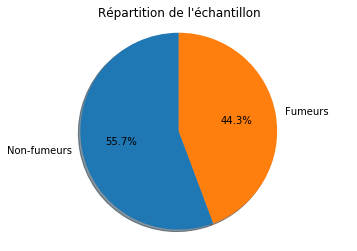

In [9]:
labels = 'Non-fumeurs', 'Fumeurs'
sizes = [non_smokers/total,(smokers/total)]
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels,shadow=True,startangle=90,autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Répartition de l\'échantillon')
plt.show()


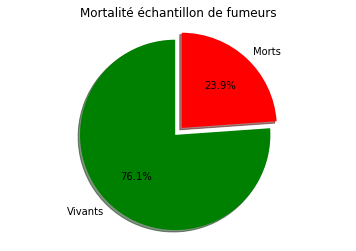

In [10]:
labels = 'Vivants', 'Morts'
sizes = [1-death_rate_smokers,death_rate_smokers]
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels,explode=explode,startangle=90,shadow=True,autopct='%1.1f%%',colors=('green','red'))
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Mortalité échantillon de fumeurs')
plt.show()

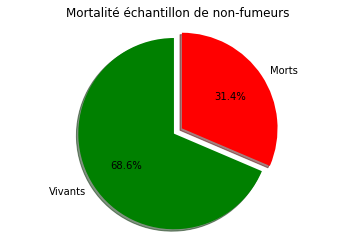

In [11]:
labels = 'Vivants', 'Morts'
sizes = [1-death_rate_non_smokers,death_rate_non_smokers]
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels,explode=explode,startangle=90,shadow=True,autopct='%1.1f%%',colors=('green','red'))
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Mortalité échantillon de non-fumeurs')
plt.show()

Intervalle de confiance ?

Il apparait alors que la mortalité est plus importante au sein de l'échantillon 'non-fumeur', une conclusion hâtive peut donc nous amener à mettre en doute la plus connues des inscription figurant sur les paquets de cigarettes actuels.

## Prise en compte de l'âge

Notre analyse précédante nous mêne à une contradiction avec le célèbre _Fumer Tue_. On se penche donc sur la répartition d'âge au sein des groupes afin de voir si cela peut mener à une explication.
On commence par regrouper par tranche d'âge (18-34,34-54,55-64,65+)

In [27]:
data.loc[data['Age']<35,'Categorie d\'âge'] = 'A'
data.loc[(data['Age']<55) & (data['Age']>=35),'Categorie d\'âge'] = 'B'
data.loc[(data['Age']<65) & (data['Age']>=55),'Categorie d\'âge'] = 'C'
data.loc[data['Age']>=65,'Categorie d\'âge'] = 'D'

In [28]:
data



Smoker Status   Age Catégorie d'âge Categorie Categorie d'âge
0       Yes  Alive  21.0               A       NaN               A
1       Yes  Alive  19.3               A         A               A
2        No   Dead  57.5               A       NaN               C
3        No  Alive  47.1               A       NaN               B
4       Yes  Alive  81.4               A       NaN               D
5        No  Alive  36.8               A       NaN               B
6        No  Alive  23.8               A       NaN               A
7       Yes   Dead  57.5               A       NaN               C
8       Yes  Alive  24.8               A       NaN               A
9       Yes  Alive  49.5               A       NaN               B
10      Yes  Alive  30.0               A       NaN               A
11       No   Dead  66.0               A       NaN               D
12      Yes  Alive  49.2               A       NaN               B
13       No  Alive  58.4               A       NaN               C
14       No   Dead  60.6               A       NaN               C
15       No  Alive  25.1               A       NaN               A
16       No  Alive  43.5               A       NaN               B
17       No  Alive  27.1               A       NaN               A
18       No  Alive  58.3               A       NaN               C
19      Yes  Alive  65.7               A       NaN               D
20       No   Dead  73.2               A       NaN               D
21      Yes  Alive  38.3               A       NaN               B
22       No  Alive  33.4               A       NaN               A
23      Yes   Dead  62.3               A       NaN               C
24       No  Alive  18.0               A         A               A
25       No  Alive  56.2               A       NaN               C
26      Yes  Alive  59.2               A       NaN               C
27       No  Alive  25.8               A       NaN               A
28       No   Dead  36.9               A       NaN               B
29       No  Alive  20.2               A         A               A
...     ...    ...   ...             ...       ...             ...
1284    Yes   Dead  36.0               A       NaN               B
1285    Yes  Alive  48.3               A       NaN               B
1286     No  Alive  63.1               A       NaN               C
1287     No  Alive  60.8               A       NaN               C
1288    Yes   Dead  39.3               A       NaN               B
1289     No  Alive  36.7               A       NaN               B
1290     No  Alive  63.8               A       NaN               C
1291     No   Dead  71.3               A       NaN               D
1292     No  Alive  57.7               A       NaN               C
1293     No  Alive  63.2               A       NaN               C
1294     No  Alive  46.6               A       NaN               B
1295    Yes   Dead  82.4               A       NaN               D
1296    Yes  Alive  38.3               A       NaN               B
1297    Yes  Alive  32.7               A       NaN               A
1298     No  Alive  39.7               A       NaN               B
1299    Yes   Dead  60.0               A       NaN               C
1300     No   Dead  71.0               A       NaN               D
1301     No  Alive  20.5               A         A               A
1302     No  Alive  44.4               A       NaN               B
1303    Yes  Alive  31.2               A       NaN               A
1304    Yes  Alive  47.8               A       NaN               B
1305    Yes  Alive  60.9               A       NaN               C
1306     No   Dead  61.4               A       NaN               C
1307    Yes  Alive  43.0               A       NaN               B
1308     No  Alive  42.1               A       NaN               B
1309    Yes  Alive  35.9               A       NaN               B
1310     No  Alive  22.3               A       NaN               A
1311    Yes   Dead  62.1               A       NaN  